In [1]:
from src.loaders.data_loader import load_train_data

df = load_train_data()
df

import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
from src.preprocessors.add_columns import add_sin_cos
from src.preprocessors.preprocessors import apply_standard_scale
from src.preprocessors.preprocessors import split_train_valid_test

df = add_sin_cos(df, "Hour")
train_df, valid_df, test_df = split_train_valid_test(df, [0.7, 0.2, 0.1])
scaled_train_df, scaled_valid_df, scaled_test_df = apply_standard_scale(train_df, valid_df, test_df)

print(scaled_train_df.shape, scaled_valid_df.shape, scaled_test_df.shape)

ImportError: cannot import name 'add_sin_cos' from 'src.preprocessors.add_columns' (C:\Users\bees1\PycharmProjects\dacon\235680\src\preprocessors\add_columns.py)

In [3]:
TAU = 0.1 / train_df.std()["TARGET"]
TAU

0.003929338470496466


            Total window size: 144
            Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
            Label indices: [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143]
            Label column name(s): None
        

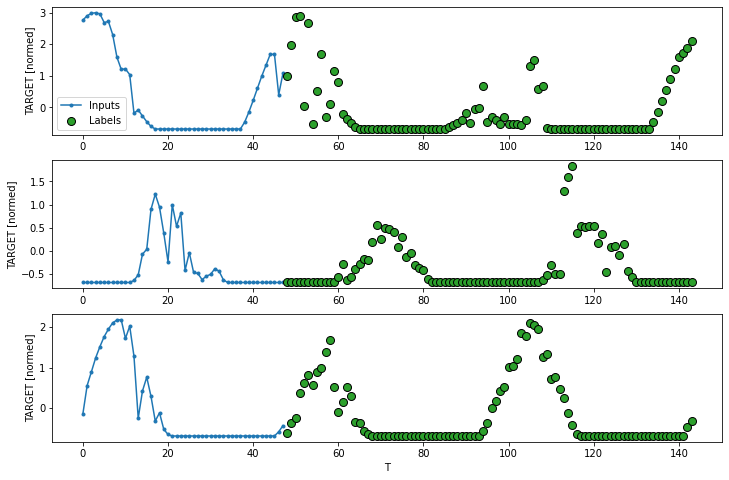

In [4]:
from src.loaders.window_generator import WindowGenerator
INPUT_STEPS = 48
OUT_STEPS = 96
TAU = 0.1
multi_window = WindowGenerator(
    scaled_train_df,
    scaled_valid_df,
    scaled_test_df,
    input_width=INPUT_STEPS,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
)

multi_window.plot()
multi_window

In [5]:
column_index = [i for i, name in enumerate(df.columns) if name == "TARGET"][0]
column_index

multi_val_performance = {}
multi_performance = {}


324/324 [==============================] - 1s 2ms/step - loss: 0.4719 - mean_absolute_error: 0.9432 - mean_squared_error: 1.7637 - _pinball_loss: 0.4719


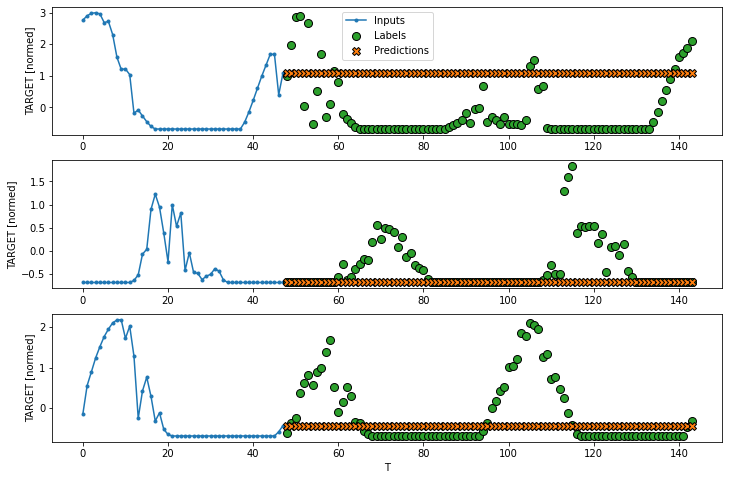

In [6]:
import tensorflow as tf
from src.model.multiple_output.baseline import MultiStepLastBaseline
from src.model.loss import pinball_loss
from src.trainers import compile_and_fit_with_pinball_loss

last_baseline = MultiStepLastBaseline(OUT_STEPS)

loss_function = pinball_loss(TAU)

last_baseline.compile(
    loss=loss_function,
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError(),
             tf.metrics.MeanSquaredError(),
             loss_function]
)

multi_val_performance["Last"] = last_baseline.evaluate(multi_window.valid)
multi_performance["Last"] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

324/324 [==============================] - 1s 2ms/step - loss: 0.1437 - mean_absolute_error: 0.2887 - mean_squared_error: 0.4236 - _pinball_loss: 0.1437


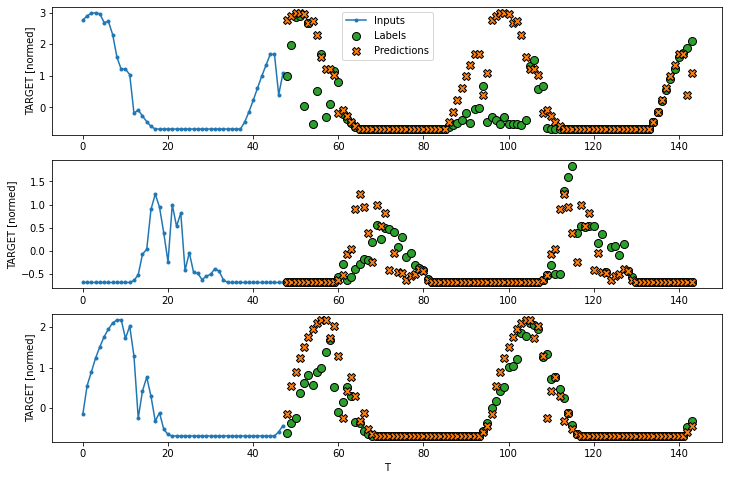

In [7]:
from src.model.multiple_output.repeat import RepeatBaseline

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(
    loss=loss_function,
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError(),
             tf.metrics.MeanSquaredError(),
             loss_function]
)

multi_val_performance["Repeat"] = repeat_baseline.evaluate(multi_window.valid)
multi_performance["Repeat"] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

Epoch 1/1000
1146/1146 [==============================] - 5s 4ms/step - loss: 0.2245 - mean_absolute_error: 0.6257 - mean_squared_error: 0.6912 - _pinball_loss: 0.2245 - val_loss: 0.0748 - val_mean_absolute_error: 0.6573 - val_mean_squared_error: 0.9427 - val__pinball_loss: 0.0748
Epoch 2/1000
1146/1146 [==============================] - 5s 4ms/step - loss: 0.0622 - mean_absolute_error: 0.5257 - mean_squared_error: 0.7300 - _pinball_loss: 0.0622 - val_loss: 0.0565 - val_mean_absolute_error: 0.5157 - val_mean_squared_error: 0.8759 - val__pinball_loss: 0.0565
Epoch 3/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0513 - mean_absolute_error: 0.4508 - mean_squared_error: 0.7253 - _pinball_loss: 0.0513 - val_loss: 0.0549 - val_mean_absolute_error: 0.5016 - val_mean_squared_error: 0.8786 - val__pinball_loss: 0.0549
Epoch 4/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0507 - mean_absolute_error: 0.4468 - mean_squared_error: 0.7300 - _pinball

Epoch 30/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.4459 - mean_squared_error: 0.7311 - _pinball_loss: 0.0506 - val_loss: 0.0547 - val_mean_absolute_error: 0.4999 - val_mean_squared_error: 0.8787 - val__pinball_loss: 0.0547
Epoch 31/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.4459 - mean_squared_error: 0.7311 - _pinball_loss: 0.0506 - val_loss: 0.0547 - val_mean_absolute_error: 0.5001 - val_mean_squared_error: 0.8787 - val__pinball_loss: 0.0547
Epoch 32/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.4459 - mean_squared_error: 0.7314 - _pinball_loss: 0.0506 - val_loss: 0.0547 - val_mean_absolute_error: 0.4998 - val_mean_squared_error: 0.8781 - val__pinball_loss: 0.0547
Epoch 33/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.4459 - mean_squared_error: 0.7311 - _pin

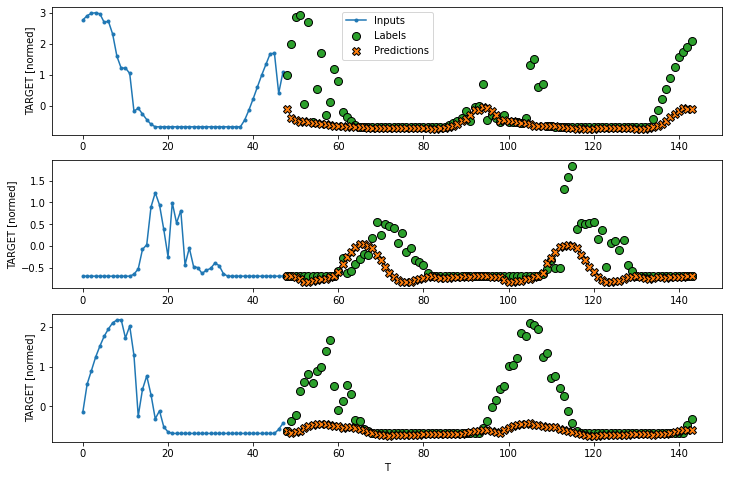

In [8]:
from src.model.multiple_output.linear import Linear

linear = Linear(OUT_STEPS, len(train_df.columns))
history = compile_and_fit_with_pinball_loss(linear, multi_window, TAU)
multi_val_performance["Linear"] = linear.evaluate(multi_window.valid)
multi_performance["Linear"] = linear.evaluate(multi_window.test, verbose=0)

multi_window.plot(linear)

Epoch 1/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0507 - mean_absolute_error: 0.4465 - mean_squared_error: 0.7313 - _pinball_loss: 0.0507 - val_loss: 0.0548 - val_mean_absolute_error: 0.5010 - val_mean_squared_error: 0.8811 - val__pinball_loss: 0.0548
Epoch 2/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0507 - mean_absolute_error: 0.4463 - mean_squared_error: 0.7312 - _pinball_loss: 0.0507 - val_loss: 0.0548 - val_mean_absolute_error: 0.5012 - val_mean_squared_error: 0.8813 - val__pinball_loss: 0.0548
Epoch 3/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0507 - mean_absolute_error: 0.4464 - mean_squared_error: 0.7315 - _pinball_loss: 0.0507 - val_loss: 0.0548 - val_mean_absolute_error: 0.5010 - val_mean_squared_error: 0.8813 - val__pinball_loss: 0.0548
Epoch 4/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0507 - mean_absolute_error: 0.4463 - mean_squared_error: 0.7313 - _pinball

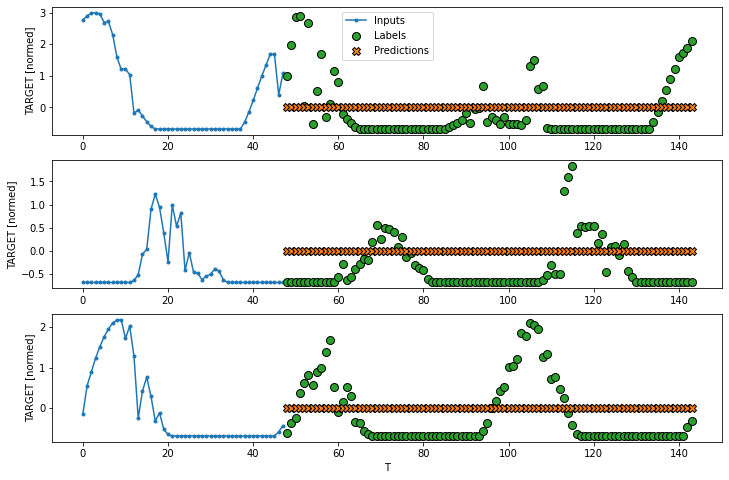

In [9]:
from src.model.multiple_output.dense import Dense

dense = Dense(OUT_STEPS, len(train_df.columns))
history = compile_and_fit_with_pinball_loss(linear, multi_window, TAU)
multi_val_performance["Dense"] = linear.evaluate(multi_window.valid)
multi_performance["Dense"] = linear.evaluate(multi_window.test, verbose=0)

multi_window.plot(dense)



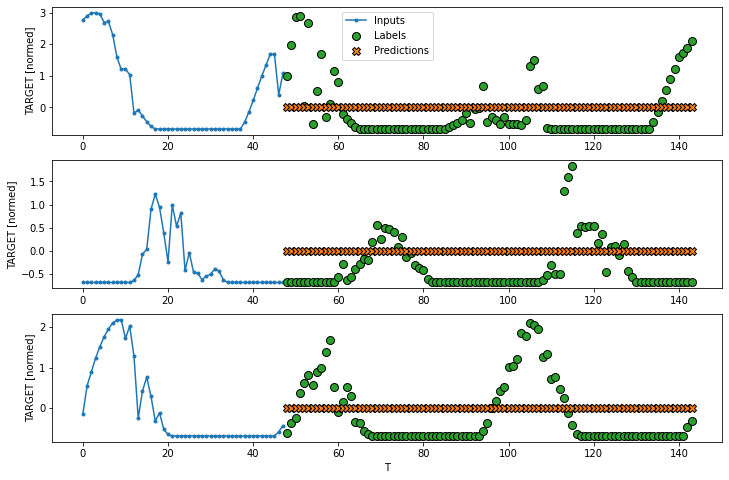

In [10]:
multi_window.plot(dense)

Epoch 1/1000
1146/1146 [==============================] - 7s 5ms/step - loss: 0.0701 - mean_absolute_error: 0.5231 - mean_squared_error: 0.7840 - _pinball_loss: 0.0701 - val_loss: 0.0563 - val_mean_absolute_error: 0.4869 - val_mean_squared_error: 0.7408 - val__pinball_loss: 0.0563
Epoch 2/1000
1146/1146 [==============================] - 5s 4ms/step - loss: 0.0470 - mean_absolute_error: 0.3993 - mean_squared_error: 0.5598 - _pinball_loss: 0.0470 - val_loss: 0.0531 - val_mean_absolute_error: 0.4638 - val_mean_squared_error: 0.7049 - val__pinball_loss: 0.0531
Epoch 3/1000
1146/1146 [==============================] - 5s 4ms/step - loss: 0.0452 - mean_absolute_error: 0.3842 - mean_squared_error: 0.5418 - _pinball_loss: 0.0452 - val_loss: 0.0518 - val_mean_absolute_error: 0.4397 - val_mean_squared_error: 0.6640 - val__pinball_loss: 0.0518
Epoch 4/1000
1146/1146 [==============================] - 5s 4ms/step - loss: 0.0442 - mean_absolute_error: 0.3758 - mean_squared_error: 0.5332 - _pinball

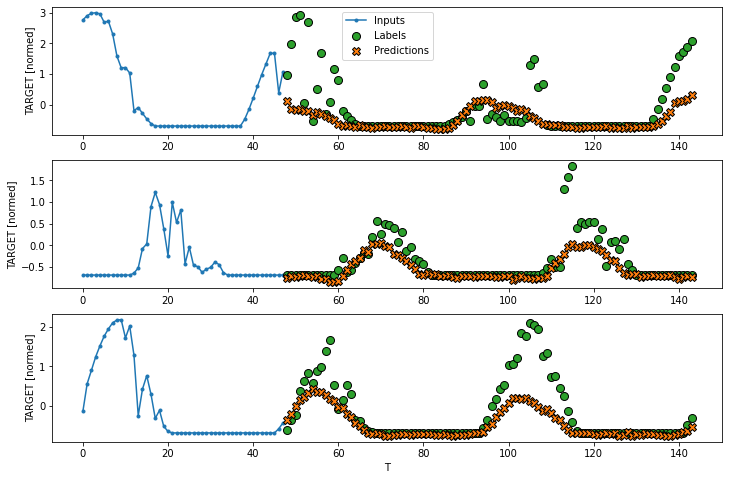

In [11]:
import src.model.multiple_output.convolution
import importlib
importlib.reload(src.model.multiple_output.convolution)
from src.model.multiple_output.convolution import Convolution


conv = Convolution(INPUT_STEPS, OUT_STEPS, len(train_df.columns))
history = compile_and_fit_with_pinball_loss(conv, multi_window, TAU)
multi_val_performance["Conv"] = conv.evaluate(multi_window.valid)
multi_performance["Conv"] = conv.evaluate(multi_window.test, verbose=0)
multi_window.plot(conv)

Epoch 1/1000
1146/1146 [==============================] - 8s 6ms/step - loss: 0.1377 - mean_absolute_error: 0.7842 - mean_squared_error: 1.2617 - _pinball_loss: 0.1377 - val_loss: 0.0752 - val_mean_absolute_error: 0.6385 - val_mean_squared_error: 1.0370 - val__pinball_loss: 0.0752
Epoch 2/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.4964 - mean_squared_error: 0.7796 - _pinball_loss: 0.0561 - val_loss: 0.0594 - val_mean_absolute_error: 0.5174 - val_mean_squared_error: 0.8229 - val__pinball_loss: 0.0594
Epoch 3/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.4131 - mean_squared_error: 0.6433 - _pinball_loss: 0.0474 - val_loss: 0.0569 - val_mean_absolute_error: 0.4910 - val_mean_squared_error: 0.7875 - val__pinball_loss: 0.0569
Epoch 4/1000
1146/1146 [==============================] - 7s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.3990 - mean_squared_error: 0.6254 - _pinball

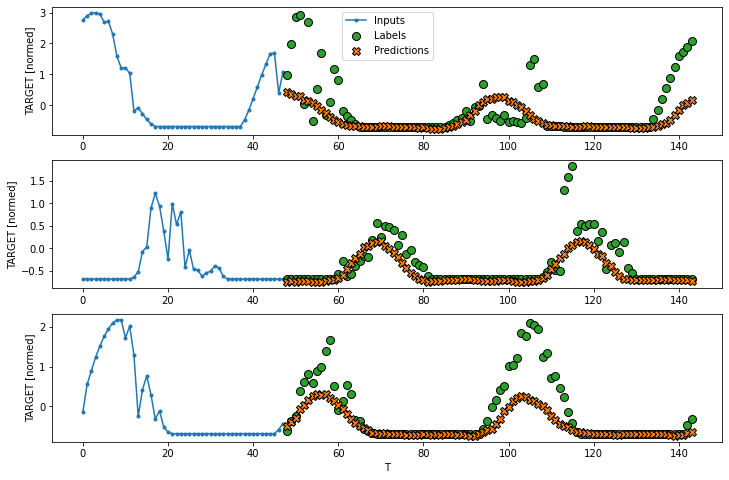

In [12]:
import src.model.multiple_output.rnn
importlib.reload(src.model.multiple_output.rnn)
from src.model.multiple_output.rnn import Lstm


lstm = Lstm(OUT_STEPS, len(df.columns))
history = compile_and_fit_with_pinball_loss(lstm, multi_window, TAU)
multi_val_performance["LSTM"] = lstm.evaluate(multi_window.valid)
multi_performance["LSTM"] = lstm.evaluate(multi_window.test, verbose=0)
multi_window.plot(lstm)

In [13]:
import numpy as np

x = np.arange(len(multi_performance))
width = 0.3

metric_name = "Pinball loss"
metric_index = "_pinball_loss"

val_pl = [v[metric_index] for v in multi_val_performance.values()]
test_pl = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_pl, width, label="Validation")
plt.bar(x + 0.17, test_pl, width, label="Test")
plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
plt.ylabel(f"LOSS (average over all times and outputs)")
_ = plt.legend()

TypeError: list indices must be integers or slices, not str

In [ ]:
from src.loaders.data_loader import load_test_data


submission_df = load_test_data()
submission_df

In [ ]:
import src.loaders.data_loader
importlib.reload(src.loaders.data_loader)

from src.loaders.data_loader import load_basic_preprocessed_predict

_, submission_df, _ = load_basic_preprocessed_predict()
submission_df


In [ ]:
from src.preprocessors.preprocessors import apply_standard_scale
from src.preprocessors.add_columns import add_sin_cos

submission_df = add_sin_cos(submission_df, "Hour")
_, scaled_df, _ = apply_standard_scale(train_df, submission_df, submission_df)
scaled_df

In [ ]:
from src.make_submissions.load_test_features import make_submission_file
from src.loaders.data_loader import load_submission_data

submission_df = load_submission_data()
make_submission_file(conv, submission_df, 48, 0.1)